In [3]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os

# Hyperparameters

In [4]:
train_length = 1000
test_length = 1500

discount_rate = 0.99
rnn_size = 10

sampling_rate = 200
striding = 100

In [5]:
def downgrade_and_feature(array):
    nchannels = array.shape[0]
    data_length = array.shape[1]
    
    temp = np.zeros(data_length)
    
    for j in range(data_length):
        for i in range(nchannels):
            temp[j] += array[i][j]
        temp[j]/=nchannels
    
    reduced_length = int(data_length/striding)

    averages = np.zeros(reduced_length, dtype = np.float32)   
    variations = np.zeros(reduced_length, dtype = np.float32)
    
    for i in range(reduced_length):
        averages[i] = np.average(temp[striding*i:striding*(i+1)])
        variations[i] = np.var(temp[striding*i:striding*(i+1)])
        
    return {'averages' : averages,'variations' : variations}

In [6]:
def dataload(patient_number, iswakeup=0):
    try :
        input_folder_path = '/home/maestoj/medical_analysis/eeg_normal'
        input_data_name = 'data{}s.csv'.format(patient_number)
        if iswakeup == 1:
            input_data_name = 'data{}w.csv'.format(patient_number)
        input_data_path = os.path.join(input_folder_path,input_data_name)
        input_file = open(input_data_path,'r',newline='')
        reader = csv.reader(input_file, delimiter=',')
        print("{} is loaded".format(input_data_name))
        temp = []
        for row in reader:
            temp.append(row)
        temp = np.array(temp, dtype=np.float32)
        temp = np.transpose(temp)
        return temp
    except FileNotFoundError:
        print("No such File")
        temp = []
        temp = np.array(temp)
        return temp

In [7]:
def time_axis_maker(array, sec_per_cell,init = 0):
    final = init + sec_per_cell*(len(array)-1)
    return np.linspace(init,final,len(array))

# Onset-time data

In [8]:
def seizure_time_parser(onset_times,patient_number,data_set_number):
    temp = str(onset_times[patient_number-1][data_set_number])
    curr_onset_time = []
    while temp.find('/')!=-1:
        curr_onset_time.append(int(temp[0:temp.find('/')]))
        temp=temp[temp.find('/')+1:]
    curr_onset_time.append(int(float(temp)))
    curr_onset_time=np.array(curr_onset_time)
    return curr_onset_time

In [9]:
seizure_file = open('seizure_times.csv','r',newline='')
reader = csv.reader(seizure_file,delimiter=',')
onset_times_temp=[]

for row in reader:
    onset_times_temp.append(row)
    
onset_times = []
total_patient = len(onset_times_temp)
event_number = np.zeros(total_patient,dtype=np.int32)
#number of events of (i+1) patient = event_number[i]

for i in range(total_patient):
    event_number[i] = len(onset_times_temp[i])-1

for p in range(total_patient):
    temp = []
    for d in range(event_number[p]):
        temp.append(seizure_time_parser(onset_times_temp,p+1,d+1))
    onset_times.append(temp)

In [10]:
print("The number of datasets of patients")
print(event_number)
print("1st patient's seizure time for each data_set")
print(onset_times[0])
print("9th patient's seizure time for each data_set")
print(onset_times[8])

The number of datasets of patients
[ 7  7  6  3 10  1  7 13 16  8  8  5  3  6 31  8  2  4]
1st patient's seizure time for each data_set
[array([820]), array([781]), array([626]), array([713]), array([807]), array([792]), array([780])]
9th patient's seizure time for each data_set
[array([200]), array([312]), array([624]), array([762]), array([752]), array([772]), array([884]), array([502]), array([ 94, 258]), array([836]), array([650]), array([636]), array([576]), array([656]), array([638]), array([706])]


In [13]:
for i in range(1,11):
    temp = dataload(i)
    try:
        print(temp.shape)
        result = downgrade_and_feature(temp)
        print(result['averages'].shape)
        print(result['variations'].shape)
    except IndexError:
        continue
for i in range(1,11):
    temp = dataload(i,1)
    try:
        print(temp.shape)
        result = downgrade_and_feature(temp)
        print(result['averages'].shape)
        print(result['variations'].shape)
    except IndexError:
        continue

data1s.csv is loaded
(22, 54000)
(540,)
(540,)
data2s.csv is loaded
(22, 57800)
(578,)
(578,)
No such File
(0,)
data4s.csv is loaded
(26, 31400)
(314,)
(314,)
data5s.csv is loaded
(26, 41200)
(412,)
(412,)
data6s.csv is loaded
(22, 170400)
(1704,)
(1704,)
data7s.csv is loaded
(22, 46800)
(468,)
(468,)
No such File
(0,)
data9s.csv is loaded
(26, 45800)
(458,)
(458,)
data10s.csv is loaded
(22, 47000)
(470,)
(470,)
data1w.csv is loaded
(22, 28800)
(288,)
(288,)
data2w.csv is loaded
(22, 36200)
(362,)
(362,)
data3w.csv is loaded
(22, 47800)
(478,)
(478,)
data4w.csv is loaded
(26, 27600)
(276,)
(276,)
data5w.csv is loaded
(26, 38600)
(386,)
(386,)
data6w.csv is loaded
(22, 45400)
(454,)
(454,)
data7w.csv is loaded
(22, 41200)
(412,)
(412,)
data8w.csv is loaded
(22, 50000)
(500,)
(500,)
data9w.csv is loaded
(26, 22800)
(228,)
(228,)
data10w.csv is loaded
(22, 40800)
(408,)
(408,)


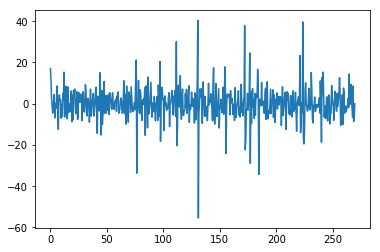

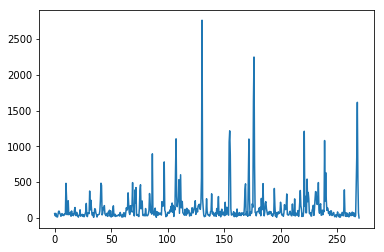

In [14]:
plt.plot(time, result['averages'])
plt.show()

plt.plot(time, result['variations'])
plt.show()